In [125]:
import pandas as pd, matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('data/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [127]:
df.nunique()

carat        272
cut            5
color          7
clarity        8
depth        181
table        126
price      11297
x            553
y            551
z            371
dtype: int64

In [128]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [129]:
df['cut'] = df['cut'].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

In [130]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_object_dtype

In [131]:
df_new = pd.DataFrame()
for col in df :
    if is_object_dtype(df[col]) :
        encoder = LabelEncoder()
        df_new[col] = encoder.fit_transform(df[col])
    else :
        df_new[col] = df[col]

In [132]:
df_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,0,0,2,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,4,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [133]:
y = df_new['price']

In [134]:
X = df_new.drop(['price', 'x', 'y'], axis=1)

In [135]:
from sklearn.cluster import KMeans

In [136]:
print('최적의 K값 결정')
max_k = min(10, X.shape[0])
print(f'데이터 개수: {X.shape[0]} / 최대 클러스터 개수: {max_k}')

최적의 K값 결정
데이터 개수: 50000 / 최대 클러스터 개수: 10


In [137]:
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=4, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

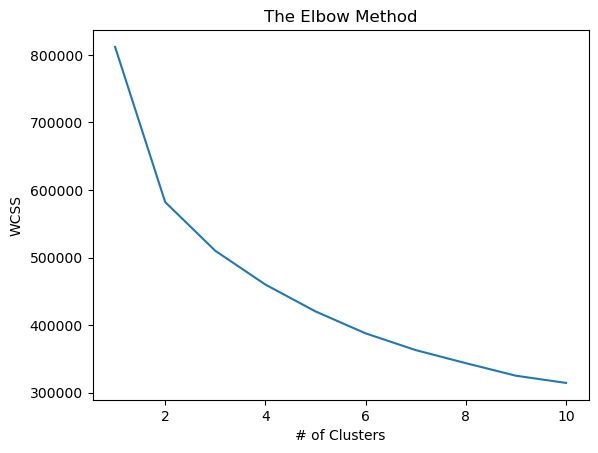

In [138]:
plt.plot(range(1, max_k + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()  

In [139]:
# 최적의 K 결정
if max_k == 3 :
    if (wcss[0] - wcss[1]) / (wcss[1] - wcss[2]) >= 1.5 :
        k = 2
    else : 
        if wcss[0] / min(wcss) >= 1.5 :
            k = 3
        else :
            k = 1
elif max_k == 2 :
    if (wcss[0] - wcss[1]) / wcss[1] >= 1 :
        k = 2 
    else :
        k = 1
else:
    best = []
    cnt = 0
    for a in range(2, max_k - 1) :
        if wcss[a - 1] - wcss[a + 1] != 0 :
            new_delta = (wcss[a - 2] - wcss[a]) / (wcss[a - 1] - wcss[a + 1])
            if new_delta >= 1.5 :
                best.append(a)
            else :
                if cnt == 0 :
                    best.append(a)
                    cnt += 1
                else :
                    continue
    if len(best) != 0 :
         k = max(best)
    else : 
        k = max_k
print(f'🎯 최적의 클러스터 개수: {k}개')

🎯 최적의 클러스터 개수: 3개


In [140]:
kmeans = KMeans(n_clusters=k, random_state=4)
df['type'] = kmeans.fit_predict(X)
print('✅ 유형 정보가 저장되었습니다.')

✅ 유형 정보가 저장되었습니다.


In [141]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,type
0,0.23,Excellent,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Very Good,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Fair,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Very Good,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,Fair,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Excellent,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0
49996,0.72,Fair,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0
49997,0.70,Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1
49998,0.86,Very Good,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1


In [142]:
df.to_csv('data/new_diamonds.csv', index=False)